In [1]:


pip install pandas numpy seaborn matplotlib sklearn

  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
   

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
#loading the dataset
df=pd.read_csv('healthcare_datasets.csv')

In [4]:
#checking the initial shape of the dataset
print("The initial dataset shape is: ",df.shape)

The initial dataset shape is:  (3021, 6)


In [5]:
#now we are removing the duplicate values
df=df.drop_duplicates()
print("After removing the duplicates the shape is: ",df.shape)

After removing the duplicates the shape is:  (3001, 6)


In [6]:
#As we can see in the dataset, the missing values appear as NAN
df=df.replace("NAN",np.nan)

In [7]:
print("\nMissing values before cleaning are:\n")
print(df.isnull().sum())


Missing values before cleaning are:

Patient_ID          4
Age                 2
Gender              4
Blood_Pressure      3
Cholesterol         2
Condition         990
dtype: int64


In [ ]:
#as we go through missing values, we can remove columns with more than 40% missing values
threshold=0.4
drop_col=df.columns[df.isnull().mean()>threshold]
df=df.drop(columns=drop_col)
print("Dropped columns: ",drop_col.tolist())

Dropped columns:  []


In [9]:
#handling missing values
df['Blood_Pressure']=pd.to_numeric(df['Blood_Pressure'],errors='coerce')
df['Cholesterol']=pd.to_numeric(df['Cholesterol'],errors='coerce')
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [10]:
#now converting those numeric columns properly
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns


In [11]:
#we handle numerical data with median
for col in numerical_cols:
  df[col].fillna(df[col].median())


In [12]:
#we handle categorical data with mode
for col in categorical_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [13]:
print("missing values: ")
print(df.isnull().sum())

missing values: 
Patient_ID        0
Age               2
Gender            0
Blood_Pressure    3
Cholesterol       2
Condition         0
dtype: int64


In [14]:
def clip_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower, lower,
                 np.where(df[column] > upper, upper, df[column]))

for col in ["Age", "Blood_Pressure", "Cholesterol"]:
    clip_outliers(col)

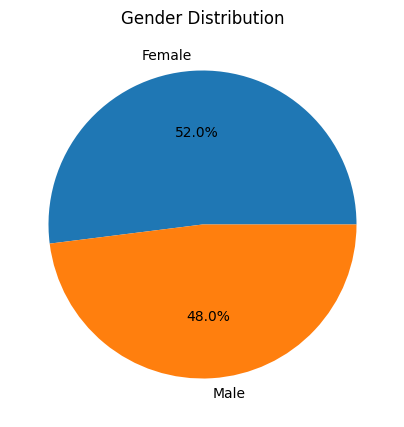

In [ ]:
# PIE CHART for Gender (male & female)
plt.figure(figsize=(5,5))
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

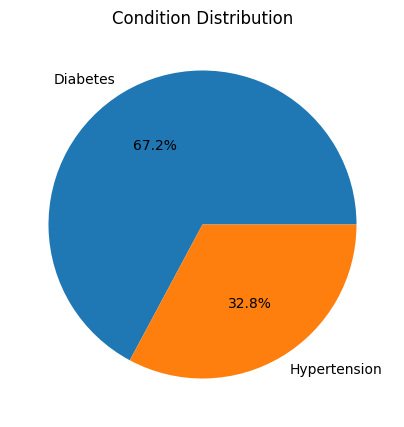

In [ ]:
# PIE CHART for Condition(diabetes & hypertension)
plt.figure(figsize=(5,5))
df["Condition"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Condition Distribution")
plt.ylabel("")
plt.show()

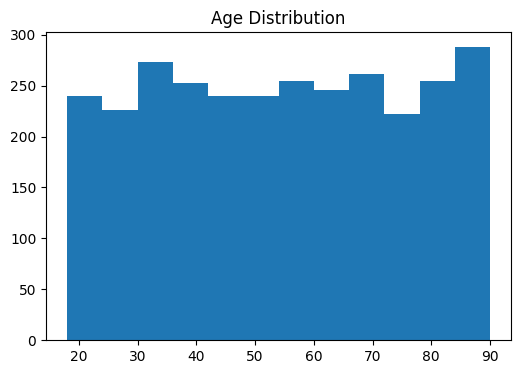

In [ ]:
# HISTOGRAMS for age, blood pressure and cholesterol
plt.figure(figsize=(6,4))
plt.hist(df["Age"], bins=12)
plt.title("Age Distribution")
plt.show()

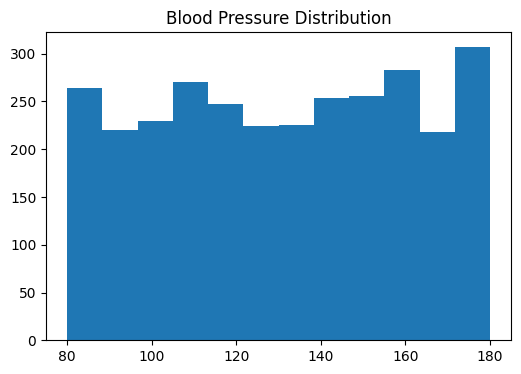

In [18]:
plt.figure(figsize=(6,4))
plt.hist(df["Blood_Pressure"], bins=12)
plt.title("Blood Pressure Distribution")
plt.show()

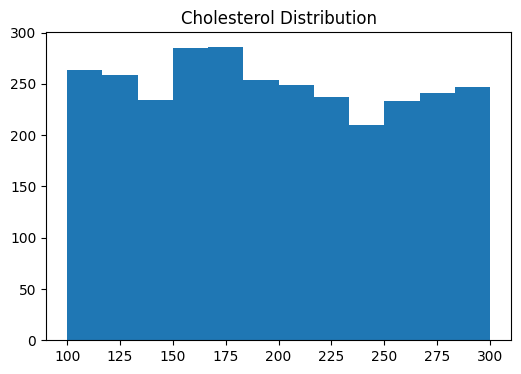

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df["Cholesterol"], bins=12)
plt.title("Cholesterol Distribution")
plt.show()


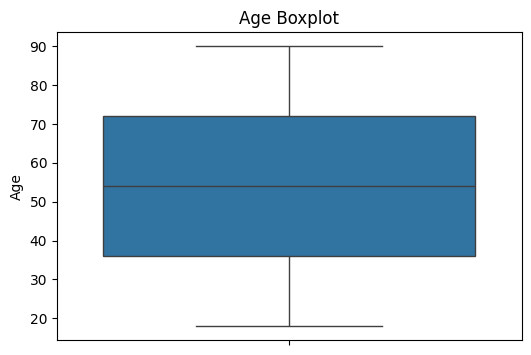

In [ ]:
# BOXPLOTS for age , blood pressure and cholesterol
plt.figure(figsize=(6,4))
sns.boxplot(df["Age"])
plt.title("Age Boxplot")
plt.show()

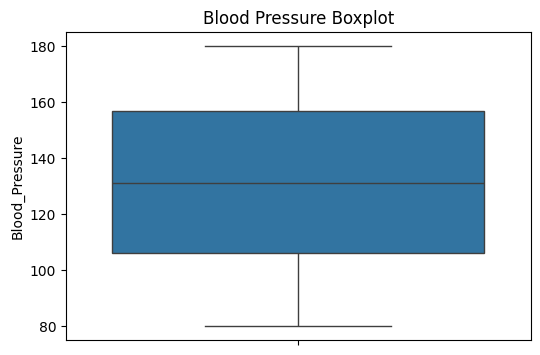

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Blood_Pressure"])
plt.title("Blood Pressure Boxplot")
plt.show()

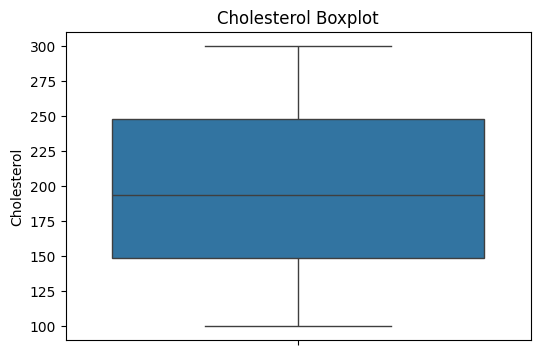

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Cholesterol"])
plt.title("Cholesterol Boxplot")
plt.show()

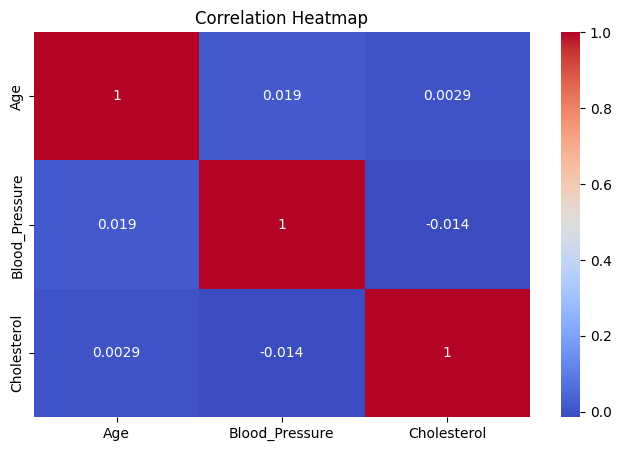

In [ ]:
# correlation heatmap for age,blood pressure and cholesterol
plt.figure(figsize=(8,5))
sns.heatmap(df[["Age","Blood_Pressure","Cholesterol"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [24]:
df["Gender_Male"] = df["Gender"].str.lower().eq("male")
df["Condition_Hypertension"] = df["Condition"].str.lower().eq("hypertension")

In [ ]:
# data scaling and encoding
scaler = StandardScaler()
encoder = OneHotEncoder(drop="first", sparse_output=False)

transformer = ColumnTransformer(
    transformers=[
        ("num", scaler, numerical_cols),
        ("cat", encoder, categorical_cols)
    ]
)

processed_data = transformer.fit_transform(df)

In [26]:
final_df = df[[
    "Age",
    "Blood_Pressure",
    "Cholesterol",
    "Gender_Male",
    "Condition_Hypertension"
]]

print("\nFinal Dataset Shape:", final_df.shape)
print(final_df.head())

# Optional: Save final dataset
final_df.to_csv("final_cleaned_dataset.csv", index=False)


Final Dataset Shape: (3001, 5)
    Age  Blood_Pressure  Cholesterol  Gender_Male  Condition_Hypertension
0  84.0            95.0        157.0         True                    True
1  40.0           163.0        285.0         True                   False
2  72.0             NaN        168.0         True                   False
3  39.0           118.0        288.0         True                   False
4  28.0           128.0        229.0        False                   False
